# Summary of Learned Concepts in CAP 4630 - Basic Concepts

This will be an in depth look on some basic machine learning algorithms and techniques.

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
from matplotlib import cm, image as mpimg, pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits import mplot3d
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
from IPython.display import HTML

## Linear Regression

Of all of machine learning algorithms, the concept of linear regression is one of the easiest to understand. It is part of a class of *regression analysis* algorithms, which are predictors of data. 

As the name suggests, this algorithm focuses on predicting strictly linear functions for sets of data. In other words, it attempts to find a plane

$$\hat{y}=b+\sum_{i=1}^{n} w_i x_i$$

that best fits the data.

How to determine whether a set of data best fits the prediction? This is the purpose of a *loss function*. In this case, a useful loss function would to be simply comparing the Euclidean distance between each data point and the best-fit line, $(y^{(i)}-\hat{y}^{(i)})^2$, and taking the average of these distances for all points $m$:

$$MSE=\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}-\hat{y}^{(i)})^2.$$

This loss function is referred to as *mean squared error*.

There also exists a closed form solution for calculating the predicted weights $\beta$ of mutlivariate linear regression (also known as multiple regression) using [*least squares*](https://en.wikipedia.org/wiki/Linear_least_squares "Linear Least Squares - Wikipedia"), which goes to show the relative simplicity of the function. The derivation leads to the form

$$\beta=\begin{bmatrix}
\beta_1 \\ \vdots \\ \beta_m \end{bmatrix}=(X^TX)^{-1}X^Ty,$$

where

$$X=\begin{bmatrix}
1 \ X_{1_1} \dots X_{1_n} \\
1 \ X_{2_1} \dots X_{2_n} \\
\ \ \vdots \ \\
1 \ X_{m_1} \dots X_{m_n} \\
\end{bmatrix}.$$

$y$ represents the vector of values for the dependent variable from the data.

As one may notice, this takes advantage of matrix inverses, which are inherently slow operations. Thus, the closed form solution does not scale well for large $n$. The following shows linear regression using least squares on some psuedo-random data.

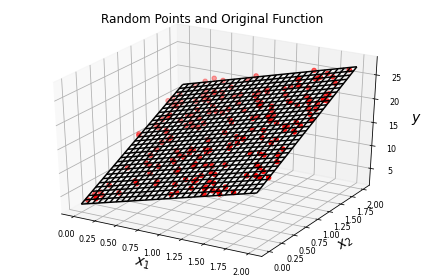

In [0]:
# The original function that will attempt to be recreated
def orig_f (x_1, x_2):
  return 3 + 5*x_1 + 7*x_2

# Creates random (x, y, z) points
m = 200
x_1 = 2 * np.random.rand(m, 1)
x_2 = 2 * np.random.rand(m, 1)
y = orig_f(x_1, x_2) + np.random.rand(m, 1)

# Configure dimensions and data for plot
x_1_dim = np.linspace(0, 2, 30)
x_2_dim = np.linspace(0, 2, 30)
X_1, X_2 = np.meshgrid(x_1_dim, x_2_dim)
Y = orig_f(X_1, X_2)

# Configure plot
fig = plt.figure()
ax = plt.axes(projection='3d')

# Plots the orginal function
ax.plot_wireframe(X_1, X_2, Y, color='black')

# Plots the random points
ax.scatter3D(x_1, x_2, y, color='red')

# Set labels and title
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
ax.set_title('Random Points and Original Function')

# Make everything fit on the chart
plt.tight_layout()

This will get the predicted weights $\beta$.

In [0]:
# We column stack x1 and x2 to form a matrix x of the bias terms
# (intialized to 1) and x_i. This matrix has shape (m, 3)
x = np.column_stack([np.ones(shape=(m, 1)),
                    x_1, x_2])

beta = np.linalg.inv(x.T @ x) @ x.T @ y
b = beta.flatten()

# Gets the weights of the original function
orig = []
orig.append(orig_f(0,0))
orig.append(orig_f(1,0) - orig[0])
orig.append(orig_f(0,1) - orig[0])
# Prints original function
print('Original Function: y = {0:.3f} + {1:.3f}(x1) + {2:.3f}(x2)'.
      format(orig[0], orig[1], orig[2]))
# Prints predicted function
print('Least Squares Predicted: y = {0:.3f} + {1:.3f}(x1) + {2:.3f}(x2)'.
      format(b[0],b[1],b[2]))

Original Function: y = 3.000 + 5.000(x1) + 7.000(x2)
Least Squares Predicted: y = 3.506 + 4.984(x1) + 7.007(x2)


If the predicted values are desired, the closed form provides a simple formula to calculate those:

$$\hat{Y}=\hat{X}\beta.$$

Thus, this provides a quick way of predicting new values, once $\beta$ is known.

## The Gradient

A fundamental part of machine learning is the concept of the direction and magnitude of the ascension/descension of a multivariate function. This information is encapsulated in the gradient of a function evaluated at the point $p$, such that

$\nabla f(p)=\begin{bmatrix} \frac{\delta f}{\delta x_1}(p) \\ \vdots \\ \frac{\delta f}{\delta x_n}(p)\end{bmatrix}$.

The gradient, being a linear function, is extremely useful in machine learning algorithms. In fact, it is so useful that it be used as a basis for the rest of the concepts in this course.

## Gradient Descent

Gradient descent is a widely popular application of the gradient, where the goal is to approach a local minimum of a multivariate function. In application, reaching a minimum is usually the desired goal of a machine learning algorithm, thus the usefulness of this is apparent.

In general terms, for a point $a$, the next point $b$ is

$b = a - \gamma\nabla f(a)$,

where $\gamma$ is the learning rate, chosen as a *hyperparameter* by the one who constructs the model. $\gamma$ needs to be chosen so that it is not too low or too high; too low of a learning rate will heavilly impede performance, whereas too high can make the gradient surpass the minimum and move $b$ further from it.

Ideally, this process will be run for a large number of iterations, or what will be later referred to as *epochs*, to get closer to the desired value.

Rather than using the general form, the following example uses a univaraite function, $y=x^2$, to demonstrate how gradient descent moves towards a local minimum:

In [0]:
# Performs gradient descent on x^2
def x2_grad_descent(lr, start_x, num_iterations):
  x_hist = []
  x = start_x
  for i in range(num_iterations):
    x_hist.append(x)
    x = x - lr*(2*x)
  return x_hist

lr = 0.005
start_point = -3
iterations = 400
# Stores all iterations of gradient descent to display
x_hist = x2_grad_descent(lr, start_point, iterations)

In [0]:
# Creates an animation showing gradient descent on x^2
fig, ax = plt.subplots()

beg = min(start_point, -start_point)
end = max(start_point, -start_point)
ax.set_xlim((beg, end))
ax.set_ylim((-1, start_point ** 2))

x_chart = np.arange(beg,end,0.001)
y_chart = x_chart ** 2

point, = ax.plot([x_chart[0]], [y_chart[0]], 'ro')
line, = ax.plot(x_chart, y_chart, lw=1)
ax.set_title('Visualization of Gradient Descent on $y=x^2$')

def animate(i):
    point.set_data(x_hist[i], x_hist[i] ** 2)
    return point,

anim = FuncAnimation(fig, animate, frames=len(x_hist),
                     interval=10, blit=True)

plt.close()
HTML(anim.to_html5_video())

[This Blog post](https://xavierbourretsicotte.github.io/animation_ridge.html) uses a more general form to perform gradient descent on a bivariate function, with animations.

## Types of Gradient Descent

When paired with a dataset, gradient descent tends to take on one of three different forms:

1. *Stochastic Gradient Descent*: Gradient descent is performed where each *batch* (non-overlapping subsets of the training set) is a single data point.
2. *Full Batch Gradient Descent*: Gradient descent is performed where there is only one batch, the entire training set.
3. *Mini-batch Gradient Descent*: A compromise between the previous two, this will perform on batches of size $n$.

## Another Look At Linear Regression

Now that the concept of gradient descent has been introduced, we can look back at the linear regression problem.

Rather than using least squares, which can very very slow for datasets with a large amount of features $n$, gradient descent can be used instead to approach that desired plane.

The following example will look at the same dataset from the least squares example, but now will perform mini-batch gradient descent.

In [0]:
# number of epochs
epochs = 100
# learning rate
lr = 0.01
# batch size
batch_size = 4
# Create three inital weights for w_0 (b), w_1 (x_1), w_2 (x_2)
initial_weight = np.random.randn(3, 1)

This calculates and stores a history of the weights.

In [0]:
# Sets the weight to be the initial weight
weight = initial_weight

# This will hold all weights from each batch
weight_path_mgd = []
weight_path_mgd.append(weight)
# Performs each epoch
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    xi_shuffled = x[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    # Runs each mini-batch
    for i in range(0, m, batch_size):
        xi = xi_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)

This can now be directly compared with the output of least squares and the original function.

In [0]:
# Gets the final weights from mini-batch gradient descent
mbgd = weight_path_mgd[-1].flatten()

# Prints the original function
print('Original Function: y = {0:.3f} + {1:.3f}(x1) + {2:.3f}(x2)'.
      format(orig[0], orig[1], orig[2]))
# Prints the predicted linear functions
print('Least Squares Predicted: y = {0:.3f} + {1:.3f}(x1) + {2:.3f}(x2)'.
      format(b[0],b[1],b[2]))
print('MBGD Predicted: y = {0:.3f} + {1:.3f}(x1) + {2:.3f}(x2)'.
      format(mbgd[0],mbgd[1],mbgd[2]))

Original Function: y = 3.000 + 5.000(x1) + 7.000(x2)
Least Squares Predicted: y = 3.506 + 4.984(x1) + 7.007(x2)
MBGD Predicted: y = 3.516 + 4.977(x1) + 7.000(x2)


## Logistic Regression

So far, there has only been one "class" of data, where the goal was to predict how to model that data. However, if the goal was to separate different types of data, there needs to be a new model for doing so. This is where logistic regression can help.

Logistic regression classifiers are the bridge between just machine learning and deep learning. It includes a stored bit of data, known as a neuron, that changes throughout the training of the network. The neuron in these classifiers is activated with the *sigmoid function*, which is defined as

$$\sigma(z) = \frac{1}{1+e^{-z}}.$$

Quite namely, the function that is used to activate a neuron in a network is known as the *activation function*. In this case, if $\sigma(z) < 0.5$, it will be treated as class 0. Otherwise, it will be treated as class 1. There are ways of making logistic regression work as a multiclass classifier (*see [One vs. All Classification](http://mlwiki.org/index.php/One-vs-All_Classification "One vs. All Classfication - ML Wiki")*), but this will focus on the vanilla binary classification schema.

To know the performance of one of these networks, a *loss function* is used. In the case of logistic networks, there are two main choices of loss functions: squared error and binary entropy. For an indepth explanation of these two loss functions, and their derivations, see [this document](https://github.com/schneider128k/machine_learning_course/blob/master/slides/logistic_regression.pdf "Logistic Regression - schneider128k").

For a complete implementation of vanilla logistic regression, [this python notebook](https://github.com/TheRealLN/CAP4630_Spring2020/blob/master/HW_3/HomeworkThree.ipynb "Logistic Regression - GitHub") makes a logistic regression network from scratch. Notice how that model uses stochastic gradient descent. If it were to use another type of gradient descent, say mini-batch, the training may go smoother.